### Task 1_Analysis on ML Test Scores
`Prasad Jadhav`

- **Batch** : Represents the Batch Name

- **User_ID** : Represents the Unique Student ID

- **Score** : Represents the Score Out of 7

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
dataset = pd.read_csv('scores_data.csv')
dataset.shape

(149, 3)

In [4]:
dataset.head()

,Batch,User_ID,Score
0,AI_ELITE_7,uid_149,6 / 7
1,AI_ELITE_7,uid_148,6 / 7
2,AI_ELITE_7,uid_147,7 / 7
3,AI_ELITE_7,uid_146,7 / 7
4,AI_ELITE_7,uid_145,4 / 7


In [5]:
dataset.tail()

,Batch,User_ID,Score
144,AI_ELITE_4,uid_5,4 / 7
145,AI_ELITE_4,uid_4,4 / 7
146,AI_ELITE_4,uid_3,4 / 7
147,AI_ELITE_4,uid_2,3 / 7
148,AI_ELITE_4,uid_1,2 / 7


In [6]:
print('Number of Rows:',dataset.shape[0])
print('Number of Columns:',dataset.shape[1])

Number of Rows: 149
Number of Columns: 3


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Batch        149 non-null    object
 1   User_ID      149 non-null    object
 2      Score     149 non-null    object
dtypes: object(3)
memory usage: 3.6+ KB


In [8]:
dataset.isnull().sum()

Batch          0
User_ID        0
   Score       0
dtype: int64

In [9]:
dataset.duplicated().sum()

0

In [10]:
dataset.describe()

,Batch,User_ID,Score
count,149,149,149
unique,3,149,8
top,AI_ELITE_7,uid_149,4 / 7
freq,53,1,40


In [11]:
dataset.columns = dataset.columns.str.replace(' ', '')

In [12]:
dataset['Batch'].value_counts()

AI_ELITE_7    53
AI_ELITE_6    48
AI_ELITE_4    48
Name: Batch, dtype: int64

In [13]:
dataset['Batch'] = dataset['Batch'].str.replace('AI_ELITE_', '')

In [14]:
dataset['Batch'].value_counts()

7    53
6    48
4    48
Name: Batch, dtype: int64

In [15]:
dataset['User_ID'].unique()

array(['uid_149', 'uid_148', 'uid_147', 'uid_146', 'uid_145', 'uid_144',
       'uid_143', 'uid_142', 'uid_141', 'uid_140', 'uid_139', 'uid_138',
       'uid_137', 'uid_136', 'uid_135', 'uid_134', 'uid_133', 'uid_132',
       'uid_131', 'uid_130', 'uid_129', 'uid_128', 'uid_127', 'uid_126',
       'uid_125', 'uid_124', 'uid_123', 'uid_122', 'uid_121', 'uid_120',
       'uid_119', 'uid_118', 'uid_117', 'uid_116', 'uid_115', 'uid_114',
       'uid_113', 'uid_112', 'uid_111', 'uid_110', 'uid_109', 'uid_108',
       'uid_107', 'uid_106', 'uid_105', 'uid_104', 'uid_103', 'uid_102',
       'uid_101', 'uid_100', 'uid_99', 'uid_98', 'uid_97', 'uid_96',
       'uid_95', 'uid_94', 'uid_93', 'uid_92', 'uid_91', 'uid_90',
       'uid_89', 'uid_88', 'uid_87', 'uid_86', 'uid_85', 'uid_84',
       'uid_83', 'uid_82', 'uid_81', 'uid_80', 'uid_79', 'uid_78',
       'uid_77', 'uid_76', 'uid_75', 'uid_74', 'uid_73', 'uid_72',
       'uid_71', 'uid_70', 'uid_69', 'uid_68', 'uid_67', 'uid_66',
       'uid_

In [16]:
dataset['User_ID'] = dataset['User_ID'].str.replace('uid_', '')

In [17]:
dataset['User_ID'].unique()

array(['149', '148', '147', '146', '145', '144', '143', '142', '141',
       '140', '139', '138', '137', '136', '135', '134', '133', '132',
       '131', '130', '129', '128', '127', '126', '125', '124', '123',
       '122', '121', '120', '119', '118', '117', '116', '115', '114',
       '113', '112', '111', '110', '109', '108', '107', '106', '105',
       '104', '103', '102', '101', '100', '99', '98', '97', '96', '95',
       '94', '93', '92', '91', '90', '89', '88', '87', '86', '85', '84',
       '83', '82', '81', '80', '79', '78', '77', '76', '75', '74', '73',
       '72', '71', '70', '69', '68', '67', '66', '65', '64', '63', '62',
       '61', '60', '59', '58', '57', '56', '55', '54', '53', '52', '51',
       '50', '49', '48', '47', '46', '45', '44', '43', '42', '41', '40',
       '39', '38', '37', '36', '35', '34', '33', '32', '31', '30', '29',
       '28', '27', '26', '25', '24', '23', '22', '21', '20', '19', '18',
       '17', '16', '15', '14', '13', '12', '11', '10', '9', '8', '7

In [18]:
dataset['Score'].value_counts()

4 / 7    40
5 / 7    32
3 / 7    24
6 / 7    18
7 / 7    18
2 / 7    12
1 / 7     3
0 / 7     2
Name: Score, dtype: int64

In [19]:
# Score : Represents the Score Out of 7
dataset['Score'] = dataset['Score'].str.replace('/ 7', '')

In [20]:
dataset['Score'].value_counts()

4     40
5     32
3     24
6     18
7     18
2     12
1      3
0      2
Name: Score, dtype: int64

In [21]:
dataset.dtypes

Batch      object
User_ID    object
Score      object
dtype: object

In [22]:
# Change Datatypes
dataset['Batch'] = dataset['Batch'].astype('int64')
dataset['User_ID'] = dataset['User_ID'].astype('int64')
dataset['Score'] = dataset['Score'].astype('int64')

In [23]:
dataset.dtypes

Batch      int64
User_ID    int64
Score      int64
dtype: object

In [24]:
dataset['Score'].describe()

count    149.000000
mean       4.382550
std        1.592199
min        0.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        7.000000
Name: Score, dtype: float64

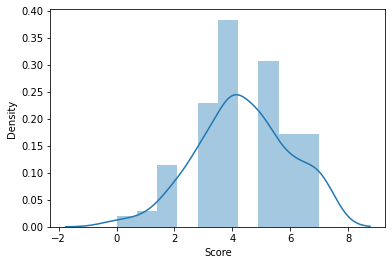

In [25]:
sns.distplot(dataset['Score'])
plt.show()

In [26]:
dataset['Batch'].value_counts()

7    53
6    48
4    48
Name: Batch, dtype: int64

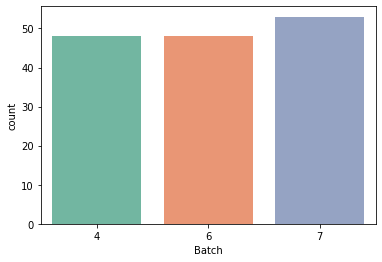

In [27]:
sns.countplot(dataset['Batch'],palette='Set2')
plt.show()

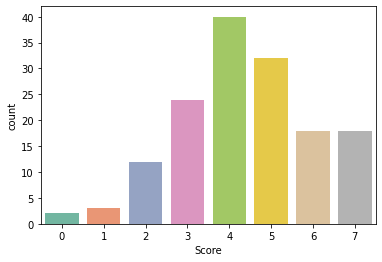

In [39]:
sns.countplot(dataset['Score'],palette='Set2')
plt.show()

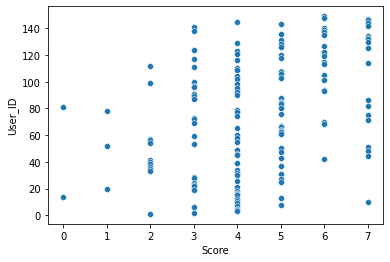

In [42]:
sns.scatterplot(dataset['Score'],dataset['User_ID'])
plt.show()

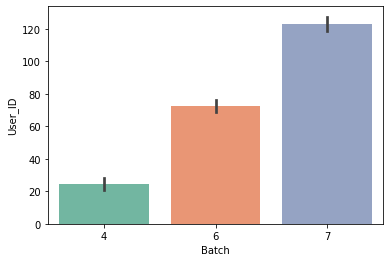

In [50]:
sns.barplot(dataset['Batch'],dataset['User_ID'],palette='Set2')
plt.show()

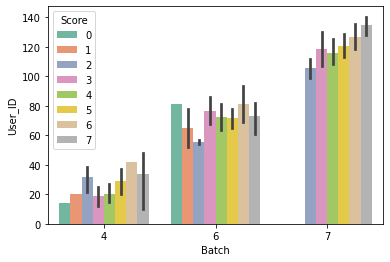

In [51]:
sns.barplot(dataset['Batch'],dataset['User_ID'],hue=dataset['Score'],palette='Set2')
plt.show()

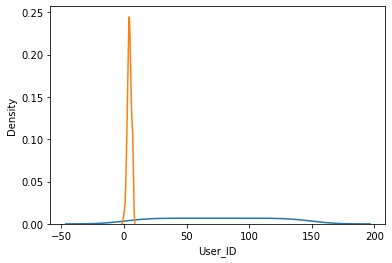

In [72]:
sns.kdeplot(dataset['User_ID'])
sns.kdeplot(dataset['Score'])
plt.show()

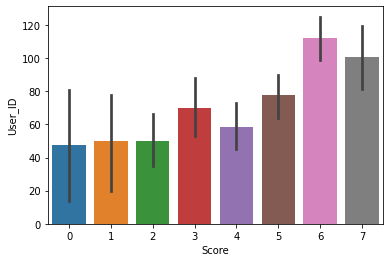

In [54]:
sns.barplot(dataset['Score'],dataset['User_ID'])
plt.show()

In [59]:
dataset['Score'].value_counts()

4    40
5    32
3    24
6    18
7    18
2    12
1     3
0     2
Name: Score, dtype: int64

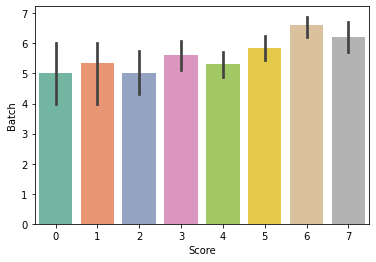

In [56]:
sns.barplot(dataset['Score'],dataset['Batch'],palette='Set2')
plt.show()

In [28]:
dataset['User_ID'].unique()

array([149, 148, 147, 146, 145, 144, 143, 142, 141, 140, 139, 138, 137,
       136, 135, 134, 133, 132, 131, 130, 129, 128, 127, 126, 125, 124,
       123, 122, 121, 120, 119, 118, 117, 116, 115, 114, 113, 112, 111,
       110, 109, 108, 107, 106, 105, 104, 103, 102, 101, 100,  99,  98,
        97,  96,  95,  94,  93,  92,  91,  90,  89,  88,  87,  86,  85,
        84,  83,  82,  81,  80,  79,  78,  77,  76,  75,  74,  73,  72,
        71,  70,  69,  68,  67,  66,  65,  64,  63,  62,  61,  60,  59,
        58,  57,  56,  55,  54,  53,  52,  51,  50,  49,  48,  47,  46,
        45,  44,  43,  42,  41,  40,  39,  38,  37,  36,  35,  34,  33,
        32,  31,  30,  29,  28,  27,  26,  25,  24,  23,  22,  21,  20,
        19,  18,  17,  16,  15,  14,  13,  12,  11,  10,   9,   8,   7,
         6,   5,   4,   3,   2,   1], dtype=int64)

In [29]:
num_features = [feature for feature in dataset.columns]

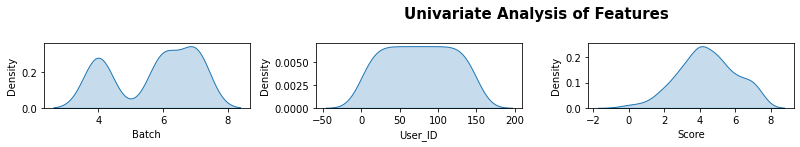

In [30]:
plt.figure(figsize=(15,15))
plt.suptitle('Univariate Analysis of Features',fontweight='bold',fontsize=15,y=1)

for i in range(0,len(num_features)):
    plt.subplot(10,4,i+1)
    sns.kdeplot(x=dataset[num_features[i]],shade=True)
    plt.tight_layout()

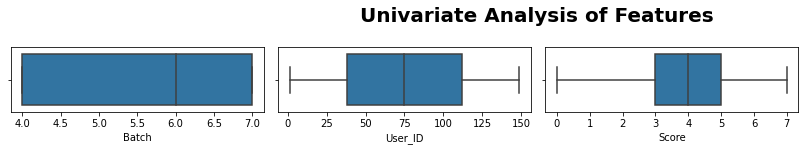

In [31]:
plt.figure(figsize = (15,15))
plt.suptitle('Univariate Analysis of Features',fontweight='bold',fontsize=20,y=1)

for i in range(0,len(num_features)):
    plt.subplot(10,4,i+1)
    sns.boxplot(data=dataset,x=num_features[i])
    plt.xlabel(num_features[i])
    plt.tight_layout()

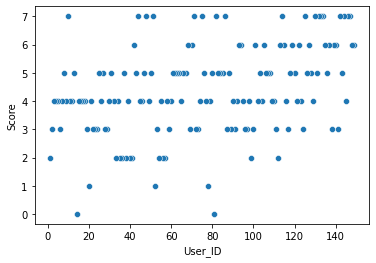

In [32]:
sns.scatterplot(dataset['User_ID'],dataset['Score'])
plt.show()

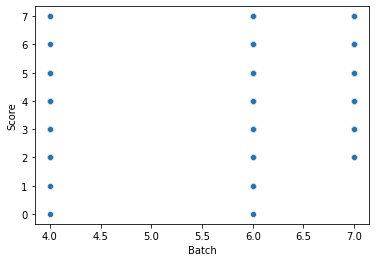

In [33]:
sns.scatterplot(dataset['Batch'],dataset['Score'])
plt.show()

In [68]:
X = dataset[['User_ID','Score']]

In [69]:
k_means = KMeans(n_clusters=5)
k_means.fit(X)

KMeans(n_clusters=5)

In [70]:
k_means.fit_predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

In [71]:
wcss = []

for i in range(1,11):
    k_means = KMeans(n_clusters=i)
    k_means.fit(X)
    wcss.append(k_means.inertia_)

In [72]:
wcss

[276025.19463087246,
 69254.2245045045,
 30946.190612244904,
 17547.177453769564,
 11342.976826103077,
 7966.251282051282,
 5949.043628834933,
 4614.389232886136,
 3726.3161764705883,
 3083.536721611722]

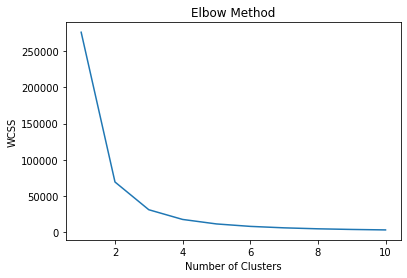

In [73]:
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [74]:
k_means = KMeans(n_clusters=5,random_state=42)
y_means = k_means.fit_predict(X)

In [75]:
y_means

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

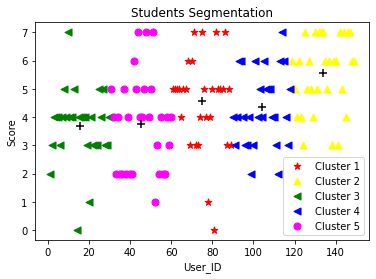

In [79]:
plt.scatter(X.iloc[y_means==0,0],X.iloc[y_means==0,1],s=50,color='red',label='Cluster 1',marker='*')
plt.scatter(X.iloc[y_means==1,0],X.iloc[y_means==1,1],s=50,color='yellow',label='Cluster 2',marker='^')
plt.scatter(X.iloc[y_means==2,0],X.iloc[y_means==2,1],s=50,color='green',label='Cluster 3',marker='<')
plt.scatter(X.iloc[y_means==3,0],X.iloc[y_means==3,1],s=50,color='blue',label='Cluster 4',marker='<')
plt.scatter(X.iloc[y_means==4,0],X.iloc[y_means==4,1],s=50,color='magenta',label='Cluster 5',marker='o')
plt.scatter(k_means.cluster_centers_[:,0],k_means.cluster_centers_[:,1],s=50,color='black',marker='+')
plt.title('Students Segmentation')
plt.xlabel('User_ID')
plt.ylabel('Score')
plt.legend()
plt.show()

In [78]:
k_means.predict([[145,4]])

array([1])

# 

### Insights

- Most of all there are many students in batch 7
- The highest score is in batch 7
- Since there are more students in batch 7 the score is high
- Smart students are in batch 6